In [28]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [91]:
class SVM:
    def __init__(self, lr=0.01, lambda_p=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_p = lambda_p
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self,X_train,Y_train):
        Y_train = np.where(Y_train <= 0, -1, 1)
        n_samples, n_features = X_train.shape

        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.n_iters):
            for i, x_i in enumerate(X_train):
                con = Y_train[i] *  (np.dot(x_i,self.w) - self.b) >= 1
                if con :
                    self.w  -=  self.lr*(2 * self.lambda_p * self.w)
                else :
                    self.w -= self.lr*((2 * self.lambda_p * self.w) - (Y_train[i]* x_i))
                    self.b -=  self.lr * Y_train[i]           

    def predict(self,X_test):
        linear_output = np.dot(X_test,self.w) - self.b
        return np.sign(linear_output)

In [112]:
X, Y =  datasets.make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.1, random_state=40)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1234)


In [113]:
clf = SVM()
clf.fit(X_train, Y_train)

 
print(clf.w, clf.b)


[0.54778029 0.22012977] -0.3900000000000002


In [114]:
predictions = clf.predict(X_test)
print(predictions)
print(Y_test)
Y_test = np.where(Y_test == 0, -1,1)
acc = [ predictions == Y_test]
print(acc)
np.sum(acc)/len(Y_test)


[ 1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1.  1.
 -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.
  1.  1.  1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1. -1.  1.
 -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.]
[1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1
 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1 1]
[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  Tr

1.0

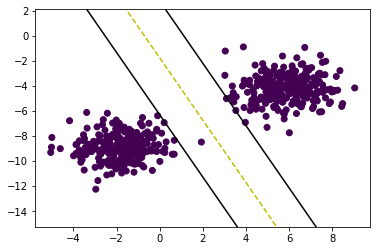